# **Trending YouTube Video (US) Statistics Analysis by Muhammad Faris Aulia Ganis**

---

## Background
A relatively big sized YouTube channel, based in the US, with their own social media team/production would like to make their videos go into the trending tab on YouTube. The team has a dataset of trending YouTube videos statistics and tasks data analysts to gain insight from this dataset.

## Problem Statement
The social media team from the channel would like to know what kind of videos that goes to the trending tab according to the Google algorithm, and would like to know how the social media team could optimise their videos production to make their own videos "trending" to gain a wider reach of audience from the website itself. **Optimise such as what kind of content/category should the team be making/focussing on, or when is the optimal time to upload** based on the dataset given. Therefore as a data analyst we would like to gain insights from the data given to help the social media team.

Problem statement:
- 1) What "Category" appears the most in trending?
- 2) What "channel_title" appears the most in trending?
- 3) The effects of number of likes, dislikes and comments on a video
- 4) The effects of enabling/disabling ratings and comments
- 5) When is the optimal time to upload for videos to go into trending?

---

## Data
To help and answer the social media team we would be analysing the Trending YouTube Video Statistics dataset from the US only.
Dataset source: https://www.kaggle.com/datasets/datasnaek/youtube-new

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Below are 5 of the top and bottom of the dataset

In [2]:
# Load Data Set
df = pd.read_csv(r"USvideos.csv")
display(df.head(), df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


### Data Understanding and Cleaning

This dataset contains 16 columns that are a YouTube video characteristics e.g. video title, channel name, views, likes, dislikes etc. But it also includes the time and date when the video is published. The columns of the dataset are:

- video_id: the ID that is associated to the video, usually for the video's link e.g. youtube.com/watch?v="video_id"
- trending_date: the date when the video is featured on the trending tab
- title: the YouTube video title
- channel_title: the YouTube channel name
- category_id: id number given to categorise the video, 
- publish_time: the date and time when the video is available to watch for the public
- tags: custom video tagging created by the channel uploader
- views: the number of views the video has
- likes: the number of likes the video has
- dislikes: the number of likes the video has
- comment_count: the number of comments under the videos
- thumbnail_link: a link to the video's thumbnail image
- comments_disabled: indicator whether the video has comments enabled or disabled using boolean True or False
- ratings_disabled: indicator whether the likes/dislikes ratio/bar is enabled or disabled
- video_arror_or_removed: indicator whether the video has been removed or is available to be viewed
- description: video description

In [3]:
# Columns, Count and their Datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
# Check the number of null values in each columns
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [5]:
null_data = df[df.isnull().any(axis=1)]
null_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


In [6]:
# Check the current format of the date and time -- YY.DD.MM 
display(df[['trending_date', 'publish_time']].head())
display('trending_date:', df['trending_date'].dtype)
display('publish_time:', df['publish_time'].dtype)

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z


'trending_date:'

dtype('O')

'publish_time:'

dtype('O')

In [7]:
# Duplicate video example
df[df['video_id'] == 'sbcbvuitiTc']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [8]:
display(df.describe(), df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [9]:
# Detailed nunique and unique values for each columns
pd.set_option('display.max_colwidth', -1)

values_list = []

for col in df.columns :
    values_list.append([col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['column_name', 'nunique', 'unique'],
                    data = values_list)
df_unique

column_name  nunique  \
0   video_id                6351      
1   trending_date           205       
2   title                   6455      
3   channel_title           2207      
4   category_id             16        
5   publish_time            6269      
6   tags                    6055      
7   views                   40478     
8   likes                   29850     
9   dislikes                8516      
10  comment_count           13773     
11  thumbnail_link          6352      
12  comments_disabled       2         
13  ratings_disabled        2         
14  video_error_or_removed  2         
15  description             6901      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

From the dataset we can see that:
- the dataset has 16 columns and 40949 rows
- the column 'description' has 570 missing values represented by 'NaN'. This represents that there some trending videos that do not have their video description. We would just replace the 'NaN' values with a text/string "No Video Description"
- it can be seen that Dtype for 'trending_date' and 'publish_time' is 'object' which is not appropriate for our objective so we would need to convert it to 'DateTime'. Format it to y-m-d and seperate the time from column 'publish_time' into another column
- there are some videos that are repeated because they stayed trending for several days
- for repeated videos, the videos interaction (likes, dislikes and comment_count) are cumulative so we will only use the value of the first time the video made it to trending
- the column 'category_id' dtype is an integer / number, we would need to convert this into their respective "category" based on the given JSON file

### Data Cleaning

In [10]:
df_clean = df.copy()

#### Category from JSON file

In [11]:
## Convert values in JSON into DataFrame
category_json = pd.DataFrame(pd.read_json('US_category_id.json')['items'])
id_list = []
title_list = []

for i in range (len(category_json)):
    cat = pd.DataFrame(pd.read_json('US_category_id.json')['items'][i])
    id_list.append(cat['id'].title)
    title_list.append(cat['snippet'].title)

id_list = [int(i) for i in id_list]
title_list = [str(i) for i in title_list]

category_tuples = list(zip(id_list, title_list))

category_dict = {id_list[i]:title_list[i] for i in range(len(id_list))}

category_df = pd.DataFrame(category_tuples, columns=['id', 'category'])
category_df.info()
category_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32 non-null     int64 
 1   category  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Can be seen that the JSON file provides 32 categories. Now we convert the values in column 'category_id' according to their 'id' from the category_df dataframe.


In [12]:
# Replacing the int values in category_id to their corresponding category

df_clean['category_id'] = df_clean['category_id'].replace(category_dict)

In [13]:
# Renaming category_id to just category

df_clean.rename(columns={"category_id": "category"}, inplace = True)

Now we convert the column 'trending_date' dtype into datetime. Then seperate the date and time/hour from column 'publish_time'

In [14]:
df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format='%y.%d.%m')

In [15]:
df_clean['publish_date'] = df_clean['publish_time'].apply(lambda x: pd.to_datetime(x[:10], format='%Y.%m.%d'))
df_clean['publish_hour'] = df_clean['publish_time'].apply(lambda x: x[11:13])

Since we only want to see the first time the video got into the trending tab, we would remove the repeated data based on the column 'video_id' whilst sorting the 'trending_date' in ascending order.

In [16]:
df_clean = df_clean.sort_values('trending_date', ascending=True).drop_duplicates('video_id', keep='first')

In [17]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 0 to 40766
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6351 non-null   object        
 1   trending_date           6351 non-null   datetime64[ns]
 2   title                   6351 non-null   object        
 3   channel_title           6351 non-null   object        
 4   category                6351 non-null   object        
 5   publish_time            6351 non-null   object        
 6   tags                    6351 non-null   object        
 7   views                   6351 non-null   int64         
 8   likes                   6351 non-null   int64         
 9   dislikes                6351 non-null   int64         
 10  comment_count           6351 non-null   int64         
 11  thumbnail_link          6351 non-null   object        
 12  comments_disabled       6351 non-null   bool   

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017-11-13,17
127,htvR_dBs3eg,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,Music,2017-11-10T21:38:57.000Z,"album|""review""|""music""|""reviews""|""indie""|""underground""|""new""|""latest""|""lyrics""|""full song""|""listen""|""track""|""concert""|""live""|""performance""|""update""|""the needle drop""|""anthony fantano""|""vlog""|""talk""|""discussion""|""music nerd""|""pop""|""soul""|""sam smith""|""the thrill of it all""|""in the lonely hour""|""too good at goodbyes""|""say it first""|""pray""|""london""",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,"Listen: https://www.youtube.com/watch?v=J_ub7Etch2U&ab_channel=SamSmithWorldVEVO\n\nUK pop singer Sam Smith's latest album turns blue-eyed soul into a chore.\n\nMore pop reviews: https://www.youtube.com/playlist?list=PLP4CSgl7K7oqibt_5oDPppWxQ0iaxyyeq?&ab_channel=theneedledrop\n\nBuy this album: http://amzn.to/2yrBJZT\n\n===================================\nSubscribe: http://bit.ly/1pBqGCN\n\nOfficial site: http://theneedledrop.com\n\nTND Twitter: http://twitter.com/theneedledrop\n\nTND Facebook: http://facebook.com/theneedledrop\n\nSupport TND: http://theneedledrop.com/support\n===================================\n\nFAV TRACKS: TOO GOOD AT GOODBYES, HIM\n\nLEAST FAV TRACK: SAY IT FIRST\n\nSAM SMITH - THE THRILL OF IT ALL / 2017 / CAPITOL / POP SOUL\n\n4/10\n\nY'all know this is just my opinion, right?",2017-11-10,21
128,qEEtzzi1EII,2017-11-14,Birthdays - Simon's Cat | GUIDE TO,Simon's Cat,Pets & Animals,2017-11-09T13:34:58.000Z,"cartoon|""simons cat""|""simon's cat""|""simonscat""|""simon tofield""|""simon the cat""|""funny cats""|""cute cats""|""cat fails""|""family friendly""|""animated animals""|""animated cats""|""tofield""|""simon's katze""|""simon""|""cat""|""black and white""|""kitty""|""black and white cat""|""Кот Саймона""|""cat lovers""|""animal (film character)""|""fail""|""funny cat""|""cats""|""cute""|""kitten""|""kittens""|""pets""|""simons cats""|""Cat""|""Simon""|""Tofield""|""cartoons""|""Toons""|""Animated""|""Animation""|""Kitten""|""Funny""|""Humour""|""videos""|""Guide to Birthdays""|""B

For analysis purposes we would not include the following columns: 'video_id', 'tags', 'thumbnail_link', 'video_error_or_removed', and 'description'

In [18]:
df_clean = df_clean.reset_index().drop('index', axis=1)

In [19]:
df_clean = df_clean[['trending_date', 'title', 'channel_title', 'category', 'publish_time', 'publish_date', 'publish_hour', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled']]

In [20]:
# check the clean dataset
df_clean

,trending_date,title,channel_title,category,publish_time,publish_date,publish_hour,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,2017-11-13,17,748374,57527,2966,15954,False,False
1,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,Music,2017-11-10T21:38:57.000Z,2017-11-10,21,98422,2926,106,798,False,False
2,2017-11-14,Birthdays - Simon's Cat | GUIDE TO,Simon's Cat,Pets & Animals,2017-11-09T13:34:58.000Z,2017-11-09,13,426078,19323,245,945,False,False
3,2017-11-14,Andy Grammer - The Good Parts (Official Audio),Andy Grammer,Music,2017-11-09T22:27:45.000Z,2017-11-09,22,33315,1365,24,91,False,False
4,2017-11-14,Remy Ma - Wake Me Up (Audio) ft. Lil' Kim,RemyMaVEVO,Music,2017-11-08T17:00:00.000Z,2017-11-08,17,1231518,32648,6221,9288,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,2018-06-14,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,Howto & Style,2018-06-12T18:55:26.000Z,2018-06-12,18,607422,26166,895,3517,False,False
6347,2018-06-14,First Take reacts: Kyrie Irving says contract extension doesn't make sense | First Take | ESPN,ESPN,Sports,2018-06-13T15:06:08.000Z,2018-06-13,15,812832,7701,320,2505,False,False
6348,2018-06-14,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,Entertainment,2018-06-13T05:27:27.000Z,2018-06-13,05,864189,18811,399,1074,False,False
6349,2018-06-14,Carla Makes BA Smashburgers | From the Test Kitchen | Bon Appétit,Bon Appétit,Howto & Style,2018-06-12T16:03:58.000Z,2018-06-12,16,540149,14206,693,1211,False,False


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   trending_date      6351 non-null   datetime64[ns]
 1   title              6351 non-null   object        
 2   channel_title      6351 non-null   object        
 3   category           6351 non-null   object        
 4   publish_time       6351 non-null   object        
 5   publish_date       6351 non-null   datetime64[ns]
 6   publish_hour       6351 non-null   object        
 7   views              6351 non-null   int64         
 8   likes              6351 non-null   int64         
 9   dislikes           6351 non-null   int64         
 10  comment_count      6351 non-null   int64         
 11  comments_disabled  6351 non-null   bool          
 12  ratings_disabled   6351 non-null   bool          
dtypes: bool(2), datetime64[ns](2), int64(4), object(5)
memory usage

---

## Data Analysis

Now that we have the clean dataset lets start analysing the data to see how we can optimise video production by answering these questions:
- 1) What "Category" appears the most in trending?
- 2) What "channel_title" appears the most in trending?
- 3) The effects of number of likes, dislikes and comments on a video
- 4) The effects of enabling/disabling ratings and comments
- 5) When is the optimal time to upload for videos to go into trending?

### 1) What "Category" appears the most in trending?

Text(0.5, 1.0, 'Fig. 1.0 - View Count of Category')

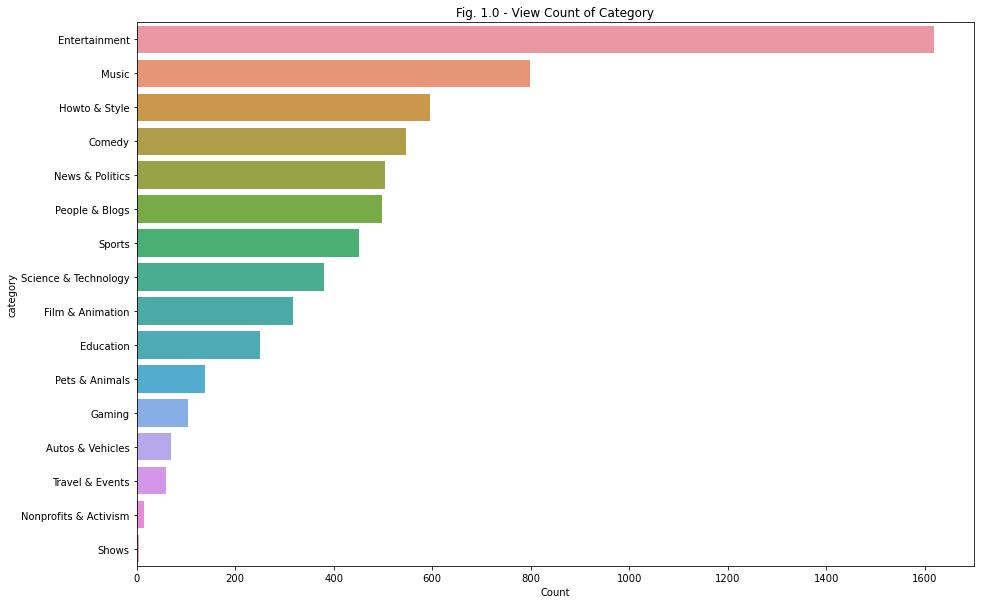

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_clean, y='category', order = df_clean['category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('category')
plt.title('Fig. 1.0 - View Count of Category')

In [23]:
df_clean[df_clean['category'] == 'Entertainment'].tail()

,trending_date,title,channel_title,category,publish_time,publish_date,publish_hour,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
6332,2018-06-13,"Kevin Durant on J.R. Smith Blunder, LeBron James & Partying After Finals Win",Jimmy Kimmel Live,Entertainment,2018-06-12T07:30:00.000Z,2018-06-12,07,1863491,29175,4595,6455,False,False
6337,2018-06-14,Courtney Hadwin: 13-Year-Old Golden Buzzer Winning Performance - America's Got Talent 2018,America's Got Talent,Entertainment,2018-06-13T02:04:30.000Z,2018-06-13,02,5829270,87323,3668,11933,False,False
6341,2018-06-14,THE NUN - Official Teaser Trailer [HD],Warner Bros. Pictures,Entertainment,2018-06-13T12:00:24.000Z,2018-06-13,12,2072162,61948,1263,6143,False,False
6348,2018-06-14,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,Entertainment,2018-06-13T05:27:27.000Z,2018-06-13,05,864189,18811,399,1074,False,False
6350,2018-06-14,"Katherine Langford on 13 Reasons Why, Australia & Doctor Parents",Jimmy Kimmel Live,Entertainment,2018-06-13T09:00:06.000Z,2018-06-13,09,296295,8157,294,764,False,False


From Fig. 1.0 above it can be seen that the category **Entertainment** dominates the trending tab by a huge margin, followed by **Music**. From the table alone it cannot be clearly seen what kind of videos or channel belong to Entertainment, but by looking from the dataset it can be seen that these belong to "Traditional" US entertainment media for TV e.g. Jimmy Kimmel Live, The Late Late Show with James Corden.

Now I would like to analyse the views for each of the categories. But before that we would check the views distribution before analysing further.

Text(0.5, 1.0, 'Fig. 1.1 - Views Distribution')

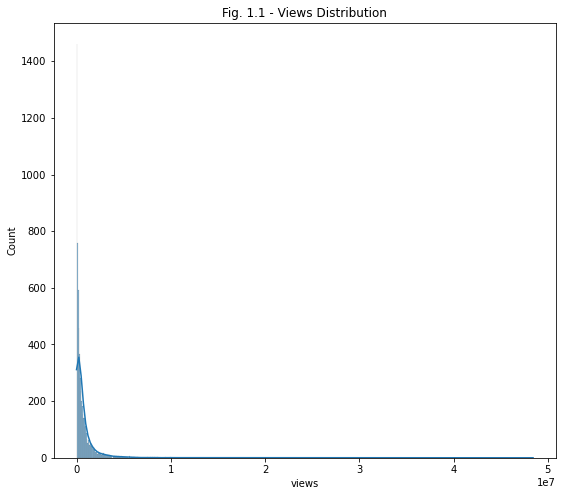

In [24]:
plt.figure(figsize=(9,8))
sns.histplot(data = df_clean['views'], kde=True)
plt.title('Fig. 1.1 - Views Distribution')

From Fig. 1.1 it can be seen that the views distribution is not normal and its right skewed. So moving forward for dealing with views we would use its median instead of mean.

In [25]:
df_1 = df_clean.groupby('category').median()[['views']].reset_index().sort_values(by='views', ascending=False)
df_1

,category,views
5,Gaming,652300.0
1,Comedy,468522.0
13,Shows,383647.5
4,Film & Animation,371256.5
7,Music,360001.0
3,Entertainment,319412.0
14,Sports,305899.0
6,Howto & Style,242099.0
12,Science & Technology,236786.0
2,Education,230944.5


Text(0.5, 1.0, 'Fig. 1.2 - Views of Category')

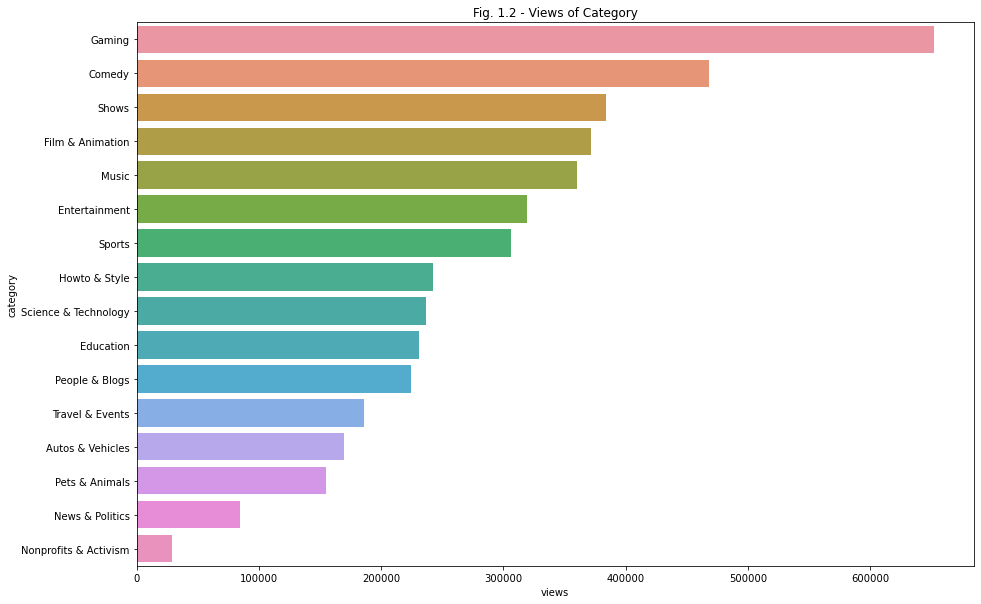

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_1, x='views', y='category')
plt.xlabel('views')
plt.ylabel('category')
plt.title('Fig. 1.2 - Views of Category')

In fig 1.2 above it can be seen that the 'gaming' category needs a very high number of views for it to be on the trending tab. 
Comparing Fig 1.2 and Fig 1.0 even though 'Entertainment' frequrntly shows up in trending, the number of views for it to frequently show up, compared with 'gaming', needs way less views.

### 2) What "channel_title" appears the most in trending?

To get an even clearer view on what kind of videos that goes on trending, lets find out what channels frequents the trending tab.

In [27]:
counts = df_clean['channel_title'].value_counts().sort_values(ascending=False).head(15)
counts

ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
Netflix                                   58
The Late Show with Stephen Colbert        58
NBA                                       55
CNN                                       52
Vox                                       47
The Late Late Show with James Corden      46
BuzzFeedVideo                             40
Refinery29                                40
Late Night with Seth Meyers               37
NFL                                       36
Saturday Night Live                       35
Name: channel_title, dtype: int64

Text(0.5, 1.0, 'Fig. 2.0 - Count of channel_title')

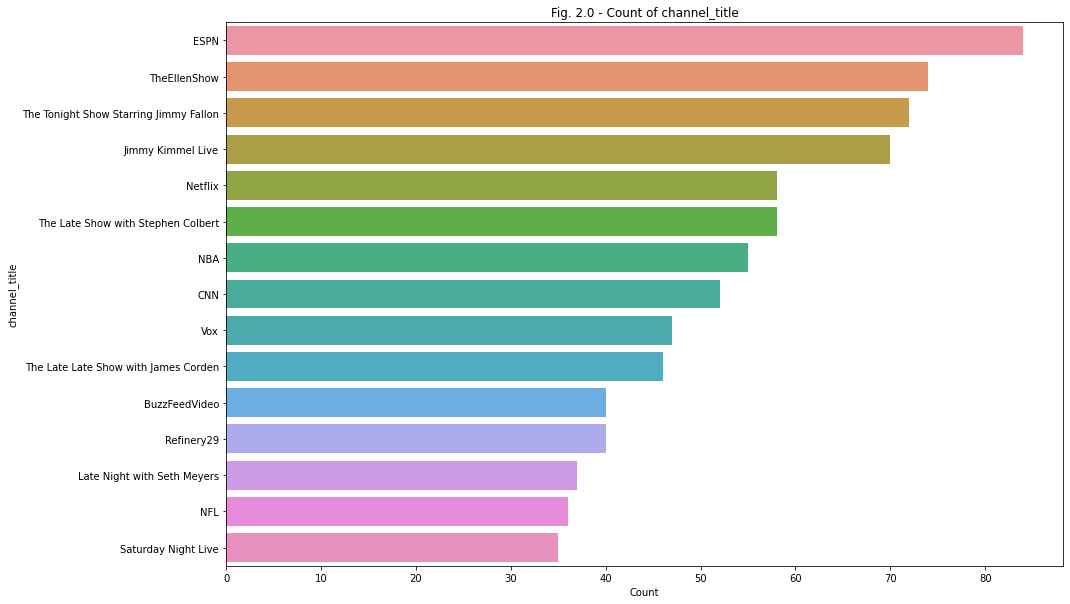

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_clean, y='channel_title', order = counts.index)
plt.xlabel('Count')
plt.ylabel('channel_title')
plt.title('Fig. 2.0 - Count of channel_title')

In [29]:
df_clean[['channel_title', 'category']].value_counts().sort_values(ascending=False).head(15)

channel_title                           category       
ESPN                                    Sports             84
TheEllenShow                            Entertainment      74
The Tonight Show Starring Jimmy Fallon  Comedy             72
Netflix                                 Entertainment      58
NBA                                     Sports             55
The Late Show with Stephen Colbert      Entertainment      54
CNN                                     News & Politics    52
Jimmy Kimmel Live                       Entertainment      48
Vox                                     News & Politics    47
The Late Late Show with James Corden    Entertainment      41
BuzzFeedVideo                           People & Blogs     39
Late Night with Seth Meyers             Comedy             37
NFL                                     Sports             36
Refinery29                              Howto & Style      35
Saturday Night Live                     Entertainment      35
dtype: int64

From fig 2.0 the channel that frequents the trending tab the most is 'ESPN' that belongs to the 'Sports' category.

### 3) The effects of likes, dislikes and comments on videos

Once again before analysing lets check the data distribution for the likes to dislike ratio.

In [30]:
# calculate likes to dislikes ratio
ratio = df_clean['likes'] / df_clean['dislikes']

In [31]:
df_3 = df_clean.copy()

In [32]:
# insert new ratio column to existing dataframe
df_3.insert(10, column = 'likes_to_dislikes_ratio', value = ratio)

Text(0.5, 1.0, 'Fig. 3.0 - Views Distribution')

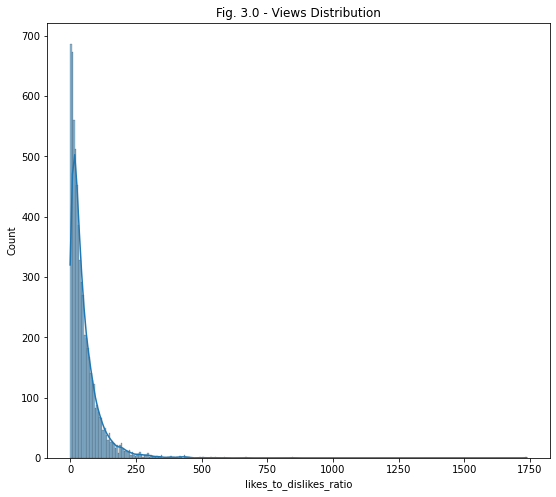

In [33]:
plt.figure(figsize=(9,8))
sns.histplot(data = df_3['likes_to_dislikes_ratio'], kde=True)
plt.title('Fig. 3.0 - Views Distribution')

As the distribution is right skewed (not normally distributed) we would be analysing through its median and not mean.

Text(0.5, 1.0, 'Fig. 3.1 - Likes to Dislikes Ratio Median For Each Category')

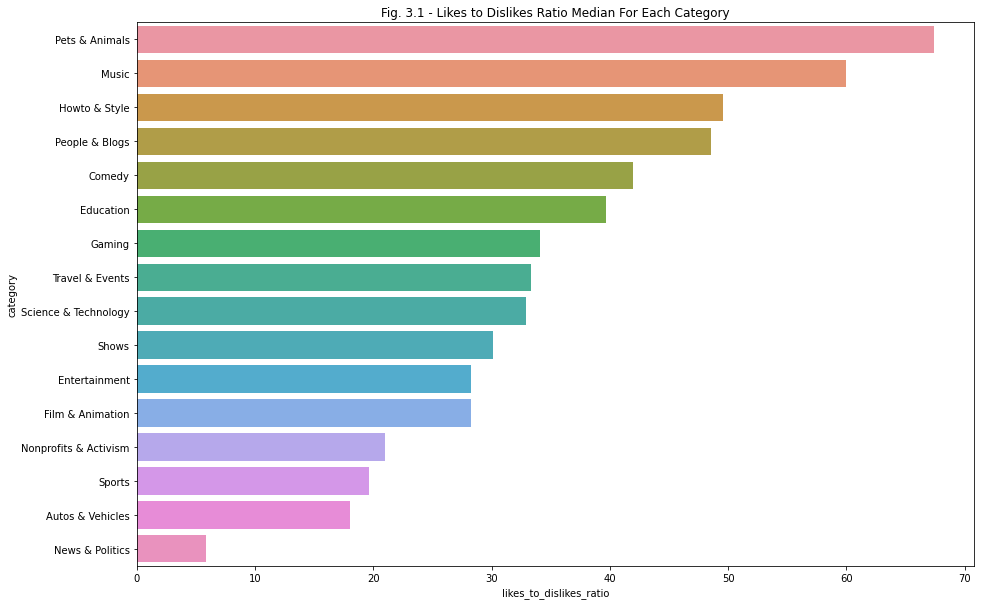

In [34]:
df_3a = df_3.groupby('category').median()[['likes_to_dislikes_ratio']].reset_index().sort_values(by='likes_to_dislikes_ratio', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(data=df_3a, y='category',x='likes_to_dislikes_ratio')
plt.title('Fig. 3.1 - Likes to Dislikes Ratio Median For Each Category')

From fig 3.0 even though 'News & Politics' has the lowest median "likes to dislikes ratio," the category still frequents the trending tab (Top 5) from fig 1.0. Conversely for 'Pets & Animals' category to have the highest median ratio, it only ranks 11 out of 16 from fig 1.0 (i.e. does not frequent trending tab often).

In [35]:
empty = []

for i in range(len(df_3)):
    if df_3['likes'][i] > df_3['dislikes'][i]:
        empty.append('liked')
    else:
        empty.append('disliked')

df_3.insert(11, column = 'liked_or_disliked', value = empty)

Text(0.5, 1.0, 'Fig. 3.2 - Count Comparison Between Liked and Disliked Videos')

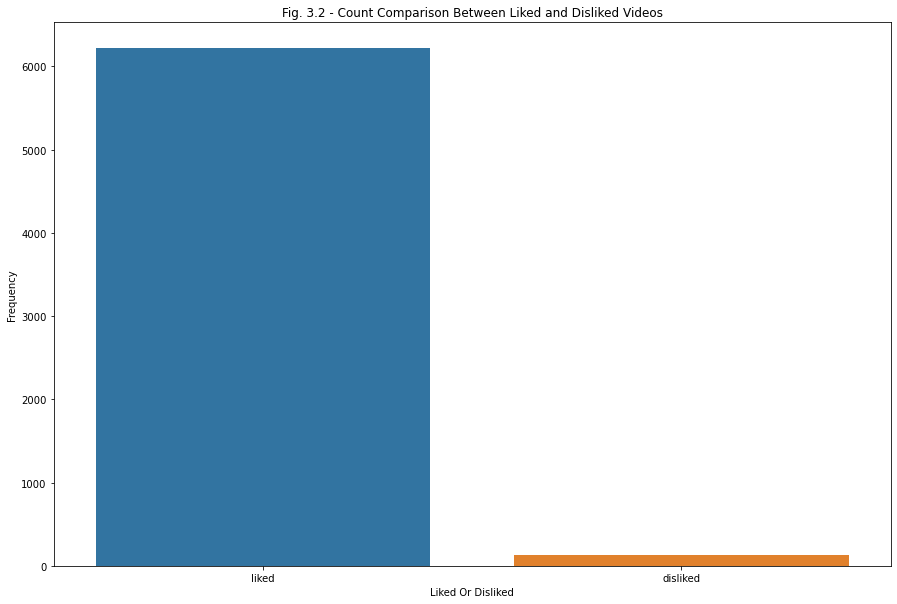

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_3, x='liked_or_disliked')
plt.xlabel('Liked Or Disliked')
plt.ylabel('Frequency')
plt.title('Fig. 3.2 - Count Comparison Between Liked and Disliked Videos')

As seen in Fig 3.2 videos that has more likes than dislikes seem to appear more in trending.

Text(0.5, 1.0, 'Fig. 3.3 - Comment Count Distribution')

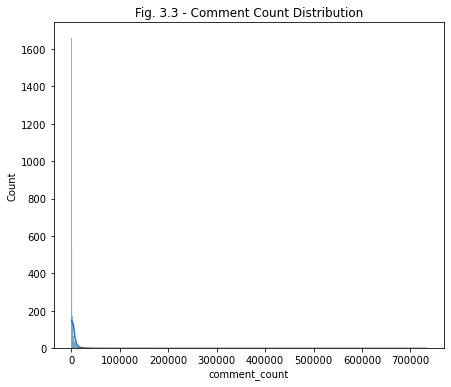

In [37]:
plt.figure(figsize=(7,6))
sns.histplot(data = df_3['comment_count'], kde=True)
plt.title('Fig. 3.3 - Comment Count Distribution')

Text(0.5, 1.0, 'Fig. 3.4 - Comment Count Median For Each Category')

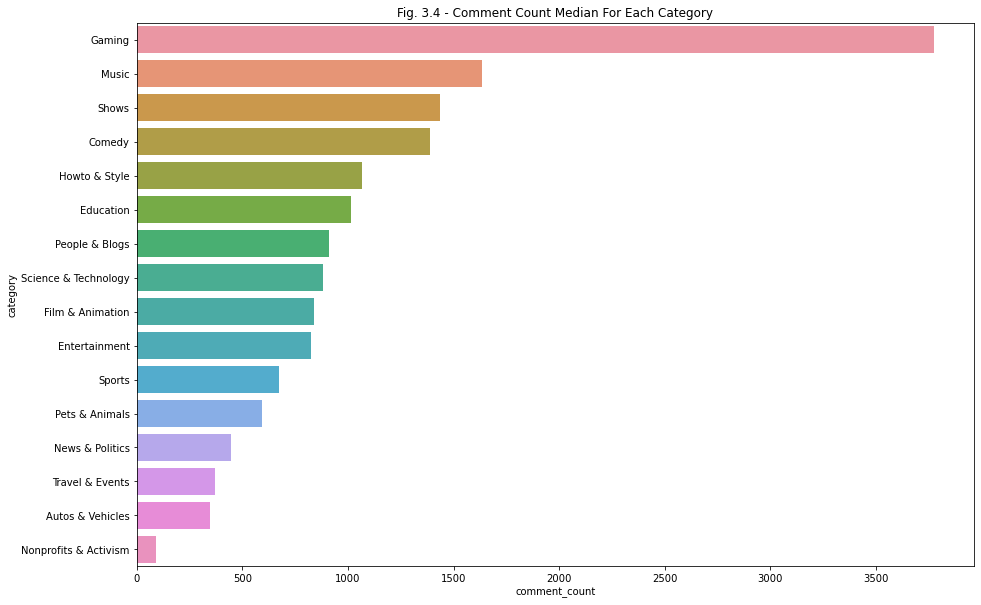

In [38]:
df_3b = df_3.groupby('category').median()[['comment_count']].reset_index().sort_values(by='comment_count', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(data=df_3b, y='category', x='comment_count')
plt.title('Fig. 3.4 - Comment Count Median For Each Category')

Same with view counts for videos, category gaming has the highest median comment count. But again, comaparing with the frequency of it appearing on the trending tab it only ranks at 12 out of 16 different categories.

### 4) The effects of enabling/disabling ratings and comments

In [39]:
df_4 = df_3.copy()

Text(0.5, 1.0, 'Fig. 4.0 - Count Comparison for disabling ratings')

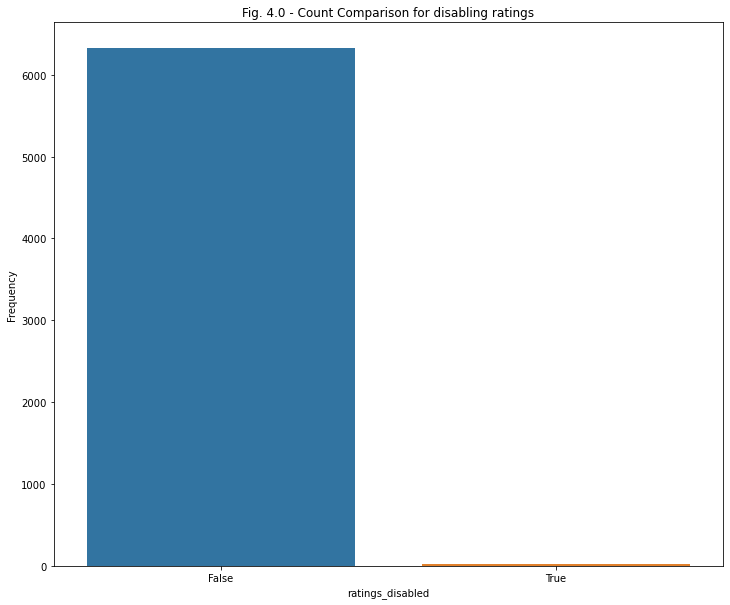

In [40]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_4, x='ratings_disabled')
plt.xlabel('ratings_disabled')
plt.ylabel('Frequency')
plt.title('Fig. 4.0 - Count Comparison for disabling ratings')

Text(0.5, 1.0, 'Fig. 4.1 - Count Comparison for disabling comments')

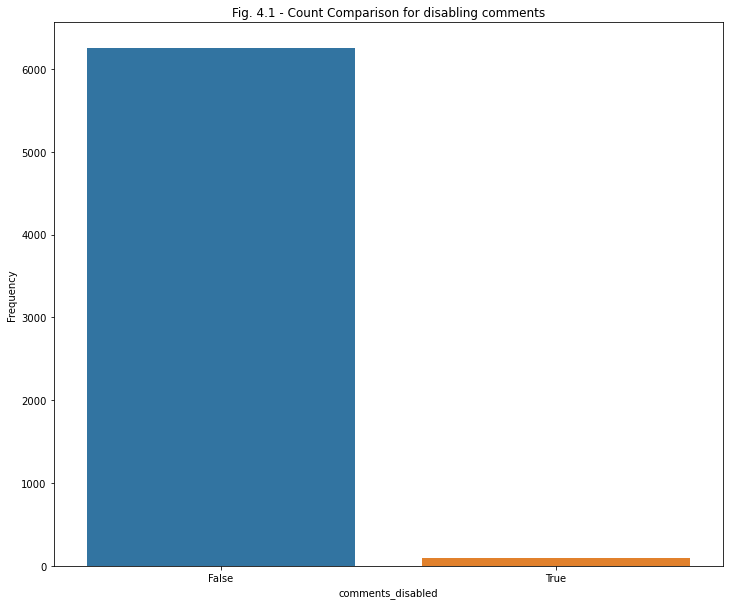

In [41]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_4, x='comments_disabled')
plt.xlabel('comments_disabled')
plt.ylabel('Frequency')
plt.title('Fig. 4.1 - Count Comparison for disabling comments')

From both Fig 4.0 and 4.1 it can be seen that videos get to trending if they have their ratings and comments enabled. 

### 5) When is the optimal time to upload for videos to go into trending?

Text(0.5, 0, 'Hour Videos are Published')

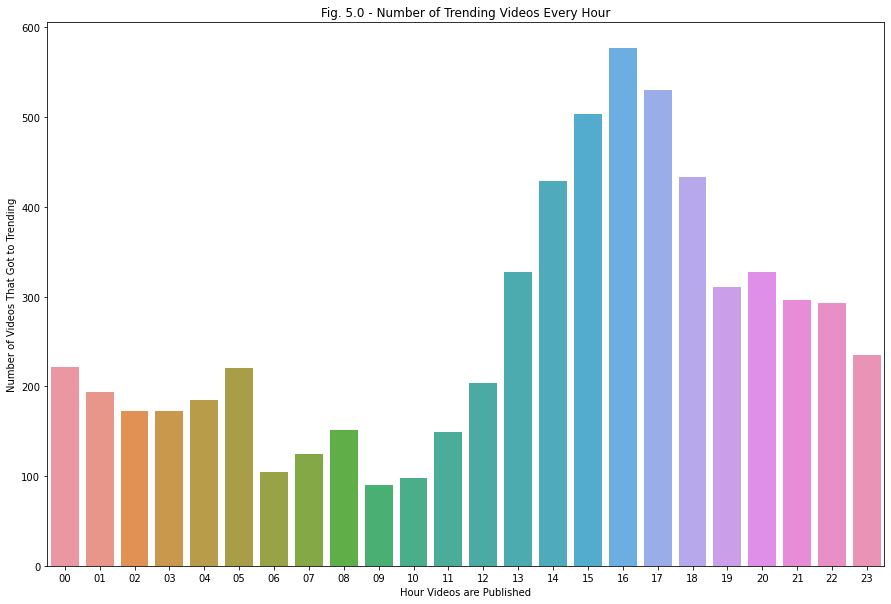

In [42]:
hour_count = df_clean['publish_hour'].value_counts()

df_5 = pd.DataFrame({'publish_hour' : hour_count.index, 'no_of_videos' : hour_count})

df_5.index = [i for i in range (0, 24)]

df_5 = df_5.sort_values(by='publish_hour')


plt.figure(figsize=(15,10))
sns.barplot(data=df_5, y='no_of_videos', x='publish_hour')
plt.title('Fig. 5.0 - Number of Trending Videos Every Hour')
plt.ylabel('Number of Videos That Got to Trending')
plt.xlabel('Hour Videos are Published')

From figure 5.0 it can be seen that a lot of videos go into trending when they are available to be watched at around 13:00 to 18:00 with peak number of videos at 16:00

---

## Conclusion & Reccomendation

From the analysis section we can summarise:

- Videos from category 'Entertainment' frequents the trending page beating every category by a huge amount.

- However, when looking at its median view count, category Entertainment do not have a large amount of views.

- From the views it can also be seen that category Gaming tops the median views ranking by a lot. But Gaming category do not frequent the trending tab often.

- When seeing the top 15 channels, can be seen that most if not all belong to "corporate" youtube channels and not channels run by individual person
or small teams. The trending tab frequents videos coming from corporate channels / traditional US media.

- Same with looking at view count, even though the top category that frequents trending is Entertainment,
looking at its like to dislike ratio, Entertainment doesnt have a lot of it.

- Videos that are generally more liked seem to appear more in trending than videos that are generally disliked by a huge amount.

- Similar trend to view count. Entertainment doesnt have a lot of comment count. But Gaming tops the comment_count numbers but again, its frequency in trending is
way lower than that of Entertainment category.

- Videos frequent trending more when their comments and ratings are enabled than disabled.

- Videos that are made available to be watched at around 16:00 hour frequents the trending tab more than at 09:00 hour.

Recommendation:

From the analysis we can recommend the stakeholders, in this case the small youtube channel, to make videos that are based on the top categories
which are Entertainment, Music, Howto & Style etc. Whether it is a combination of those categories or not we can recommend those categories as those
are what makes it to trending often. Category that the team should avoid exploring should be about Nonprofits & Activism as its the second least 
category that go into trending (the least is the category Shows, however these are mostly tv shows clips which in this case the stakeholder would likely cannot or would not produce).

If the stakeholder wants to explore or produce content that is in the category Gaming, know that based on the data for Gaming category to trend requires 
a huge amount of views (around 6 million views in its median).

We can also state to the stakeholders that if the views are generally liked, based on this data videos are most likely to trend than those generally
disliked. Again do not worry about how many likes or dislikes as can be seen from the data the top category Entertainment does not have a lot of like to dislikes ratio
but still go into trending often. Furthermore, we can recommend to keep the comments and ratings enabled because videos that have them disabled do not
go trending much.

Last that we can recommend by analysing the data is to make the videos available to the public to watch at around 16:00 hour because there are a lot of
videos that go on trending around this hour. Oppositely try not to make videos available at 09:00 as the data shows this is where the least number
of videos to go trending.